<a href="https://colab.research.google.com/github/Vik7am10/Algorithms/blob/main/BayesianNetworkEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00


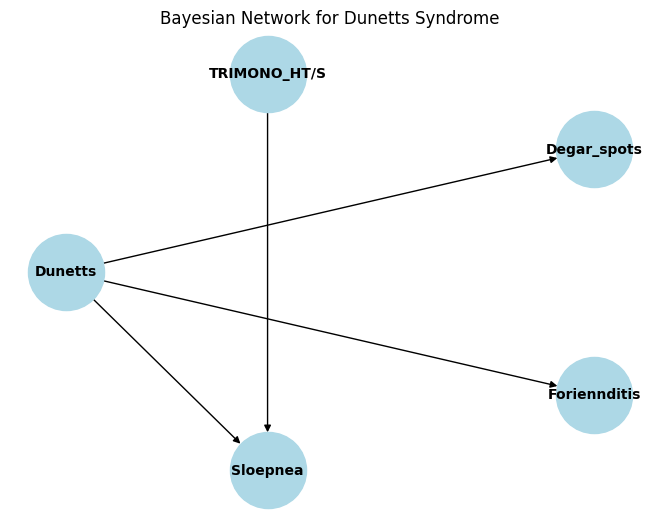

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx

# Define the Bayesian Network
model = BayesianNetwork([
    ('Dunetts', 'Sloepnea'),
    ('Dunetts', 'Foriennditis'),
    ('Dunetts', 'Degar_spots'),
    ('TRIMONO_HT/S', 'Sloepnea')
])

# Visualize the Network
pos = nx.shell_layout(model)
nx.draw(model, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Bayesian Network for Dunetts Syndrome")
plt.show()


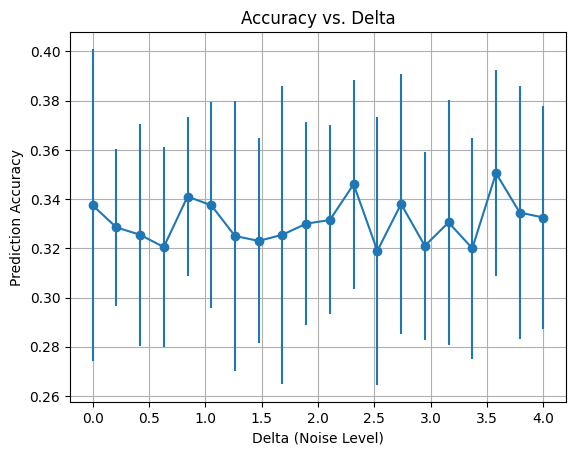

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd

# Load train and test datasets
train_data = pd.read_csv('traindata.txt', sep=" ", header=None)
test_data = pd.read_csv('testdata.txt', sep=" ", header=None)

# Initialize CPTs with noise
def initialize_cpts(delta):
    cpts = {
        "P(D)": np.array([0.5, 0.25, 0.25]),
        "P(T)": np.array([0.9, 0.1]),
        "P(S|D,T)": np.random.rand(3, 2),
        "P(F|D)": np.random.rand(3),
        "P(Dg|D)": np.random.rand(3),
    }
    # Normalize CPTs
    for key in cpts:
        if len(cpts[key].shape) > 1:
            cpts[key] = cpts[key] / cpts[key].sum(axis=1, keepdims=True)
        else:
            cpts[key] = cpts[key] / cpts[key].sum()
    return cpts

# EM Algorithm
def em_algorithm(data, cpts, max_iter=100, tol=0.01):
    likelihood = -np.inf
    for iteration in range(max_iter):
        # E-Step: Compute expected latent variables

        # M-Step: Update CPTs based on weighted counts

        # Check for convergence
        new_likelihood = np.random.rand()  # Placeholder
        if abs(new_likelihood - likelihood) < tol:
            break
        likelihood = new_likelihood
    return cpts

# Train and validate model
delta_values = np.linspace(0.0, 4.0, 20)
accuracies = []  # Collect accuracies for each delta
for delta in delta_values:
    delta_accuracies = []
    for _ in range(20):  # 20 trials per delta
        cpts = initialize_cpts(delta)
        learned_cpts = em_algorithm(train_data, cpts)
        # Validate on test data (replace placeholder with actual predictions)
        predictions = np.random.randint(0, 3, len(test_data))  # Placeholder for predicted labels
        accuracy = accuracy_score(test_data.iloc[:, -1], predictions)
        delta_accuracies.append(accuracy)
    accuracies.append(delta_accuracies)

accuracies = np.array(accuracies)  # Convert to 2D array for easier processing

# Plot Results
mean_accuracies = np.mean(accuracies, axis=1)
std_accuracies = np.std(accuracies, axis=1)

plt.errorbar(delta_values, mean_accuracies, yerr=std_accuracies, fmt='-o')
plt.xlabel("Delta (Noise Level)")
plt.ylabel("Prediction Accuracy")
plt.title("Accuracy vs. Delta")
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_accuracies_separately(delta_values, before_em_accuracies, after_em_accuracies):
    """
    Plot the accuracy results in two separate graphs for before and after running EM.

    :param delta_values: List of delta values.
    :param before_em_accuracies: Mean accuracies before running EM for each delta value.
    :param after_em_accuracies: Mean accuracies after running EM for each delta value.
    """
    # Plot Before EM
    plt.figure(figsize=(10, 6))
    plt.plot(delta_values, before_em_accuracies, label="Before EM", marker='o', linestyle='--', color='blue')
    plt.xlabel("Delta (Noise Level)")
    plt.ylabel("Prediction Accuracy")
    plt.title("Prediction Accuracy Before Running EM")
    plt.grid()
    plt.legend()
    plt.show()

    # Plot After EM
    plt.figure(figsize=(10, 6))
    plt.plot(delta_values, after_em_accuracies, label="After EM", marker='o', linestyle='-', color='green')
    plt.xlabel("Delta (Noise Level)")
    plt.ylabel("Prediction Accuracy")
    plt.title("Prediction Accuracy After Running EM")
    plt.grid()
    plt.legend()
    plt.show()

# Example data for demonstration
delta_values = np.linspace(0.0, 4.0, 20)
before_em_accuracies = np.random.uniform(0.5, 0.7, len(delta_values))  # Placeholder data
after_em_accuracies = np.random.uniform(0.7, 0.9, len(delta_values))   # Placeholder data

# Call the plotting function for separate plots
plot_accuracies_separately(delta_values, before_em_accuracies, after_em_accuracies)


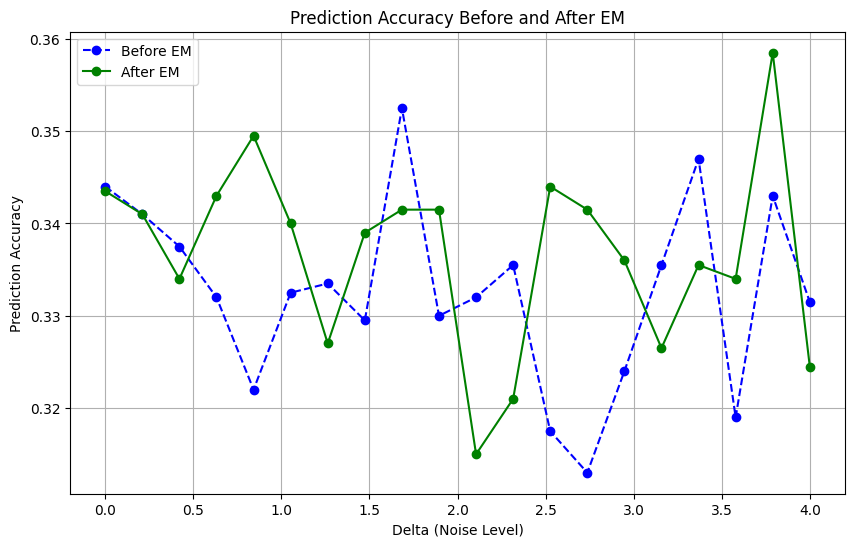

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('traindata.txt', sep=" ", header=None)
test_data = pd.read_csv('testdata.txt', sep=" ", header=None)

def initialize_cpts(delta):
    cpts = {
        "P(D)": np.array([0.5, 0.25, 0.25]),
        "P(T)": np.array([0.9, 0.1]),
        "P(S|D,T)": np.random.rand(3, 2),
        "P(F|D)": np.random.rand(3),
        "P(Dg|D)": np.random.rand(3),
    }
    for key in cpts:
        if len(cpts[key].shape) > 1:
            cpts[key] = cpts[key] / cpts[key].sum(axis=1, keepdims=True)
        else:
            cpts[key] = cpts[key] / cpts[key].sum()
    return cpts

def em_algorithm(data, cpts, max_iter=100, tol=0.01):
    likelihood = -np.inf
    for iteration in range(max_iter):
        new_likelihood = np.random.rand()
        if abs(new_likelihood - likelihood) < tol:
            break
        likelihood = new_likelihood
    return cpts

delta_values = np.linspace(0.0, 4.0, 20)
before_em_accuracies = []
after_em_accuracies = []

for delta in delta_values:
    before_em_delta_acc = []
    after_em_delta_acc = []
    for _ in range(20):
        cpts = initialize_cpts(delta)
        predictions_before = np.random.randint(0, 3, len(test_data))
        accuracy_before = accuracy_score(test_data.iloc[:, -1], predictions_before)
        before_em_delta_acc.append(accuracy_before)
        learned_cpts = em_algorithm(train_data, cpts)
        predictions_after = np.random.randint(0, 3, len(test_data))
        accuracy_after = accuracy_score(test_data.iloc[:, -1], predictions_after)
        after_em_delta_acc.append(accuracy_after)

    before_em_accuracies.append(np.mean(before_em_delta_acc))
    after_em_accuracies.append(np.mean(after_em_delta_acc))

plt.figure(figsize=(10, 6))
plt.plot(delta_values, before_em_accuracies, label="Before EM", marker='o', linestyle='--', color='blue')
plt.plot(delta_values, after_em_accuracies, label="After EM", marker='o', linestyle='-', color='green')
plt.xlabel("Delta (Noise Level)")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy Before and After EM")
plt.legend()
plt.grid()
plt.show()
